Scikit Learn Official Documentation ===>  https://scikit-learn.org/stable/modules/tree.html


# Decision Tree
Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

## Advantages

1. Simple to understand and to interpret. Trees can be visualised.
2. Requires little data preparation but this module does not support missing values.
3. Handle both numerical and categorical data.
4. Handle multi-output problem.
5. Explanation for the condition is easily explained by boolean logic.
6. Performs well even if its assumptions are somewhat violated.

## Disadvantages

1. create over-complex trees that do not generalise the data well called overfitting.
2. Decision trees can be unstable because small variations in the data might result in a completely different tree.
3. Decision tree learners create biased trees if some classes dominate.



## Implementation

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_curve,roc_auc_score
%matplotlib inline

## IMPORTING ALL THE IMPORTANT LIBRARIES

In [2]:
df=pd.read_csv('decision_tree_dataset.csv',sep='\t')
df.head()

# READING THE DATA FILE AND DISPLAYING ITS TOP OBSERVATIONS

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [3]:
df.isna().sum() # CHECKING IS THER ANY NULL VALUES

Area                       0
Perimeter                  0
Compactness                0
Length of kernel           0
Width of kernel            0
Asymmetry coefficient      0
Length of kernel groove    0
class                      0
dtype: int64

In [4]:
X=df.drop(columns=['class']) #  GETTING DEPENDENT AND INDEPENDENT VARIABLES
y=df['class']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)  

## SPLITING INTO TRAIN AND TEST DATASET

In [6]:
clf = DecisionTreeClassifier()  ## INSTANCIATIN DECISION TREE CLASSIFIER
clf.fit(X_train,y_train)   ##   FITTING THE DATA INTO IT

DecisionTreeClassifier()

In [7]:
## https://www.kdnuggets.com/2019/08/understanding-decision-trees-classification-python.html

importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(clf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
importances

,feature,importance
6,Length of kernel groove,0.553
0,Area,0.330
5,Asymmetry coefficient,0.056
1,Perimeter,0.030
4,Width of kernel,0.024
3,Length of kernel,0.007
2,Compactness,0.000


## Classification Metrics

In [8]:
y_pred=clf.predict(X_test)  ## PREDICTION ON TEST DATA 

In [9]:
confusion_matrix(y_test,y_pred)  ## CREATIN CONFUSION MATRIX

array([[11,  1,  0],
       [ 1, 14,  0],
       [ 1,  0, 14]], dtype=int64)

In [10]:
print(classification_report(y_test,y_pred))  ## CREATING CLASSIFICATION REPORT

              precision    recall  f1-score   support

           1       0.85      0.92      0.88        12
           2       0.93      0.93      0.93        15
           3       1.00      0.93      0.97        15

    accuracy                           0.93        42
   macro avg       0.93      0.93      0.93        42
weighted avg       0.93      0.93      0.93        42



[Text(714.9375, 656.202857142857, 'Length of kernel groove <= 5.576\ngini = 0.666\nsamples = 168\nvalue = [58, 55, 55]\nclass = 1'), Text(453.375, 555.2485714285714, 'Area <= 13.395\ngini = 0.509\nsamples = 113\nvalue = [57, 1, 55]\nclass = 1'), Text(279.0, 454.2942857142857, 'Length of kernel groove <= 4.869\ngini = 0.309\nsamples = 68\nvalue = [13, 0, 55]\nclass = 3'), Text(139.5, 353.34, 'Width of kernel <= 2.83\ngini = 0.375\nsamples = 12\nvalue = [9, 0, 3]\nclass = 1'), Text(69.75, 252.3857142857143, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]\nclass = 3'), Text(209.25, 252.3857142857143, 'Length of kernel <= 4.996\ngini = 0.18\nsamples = 10\nvalue = [9, 0, 1]\nclass = 1'), Text(139.5, 151.43142857142857, 'Area <= 11.95\ngini = 0.5\nsamples = 2\nvalue = [1, 0, 1]\nclass = 1'), Text(69.75, 50.477142857142894, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]\nclass = 1'), Text(209.25, 50.477142857142894, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = 3'), Text(279.0, 151.4314285714

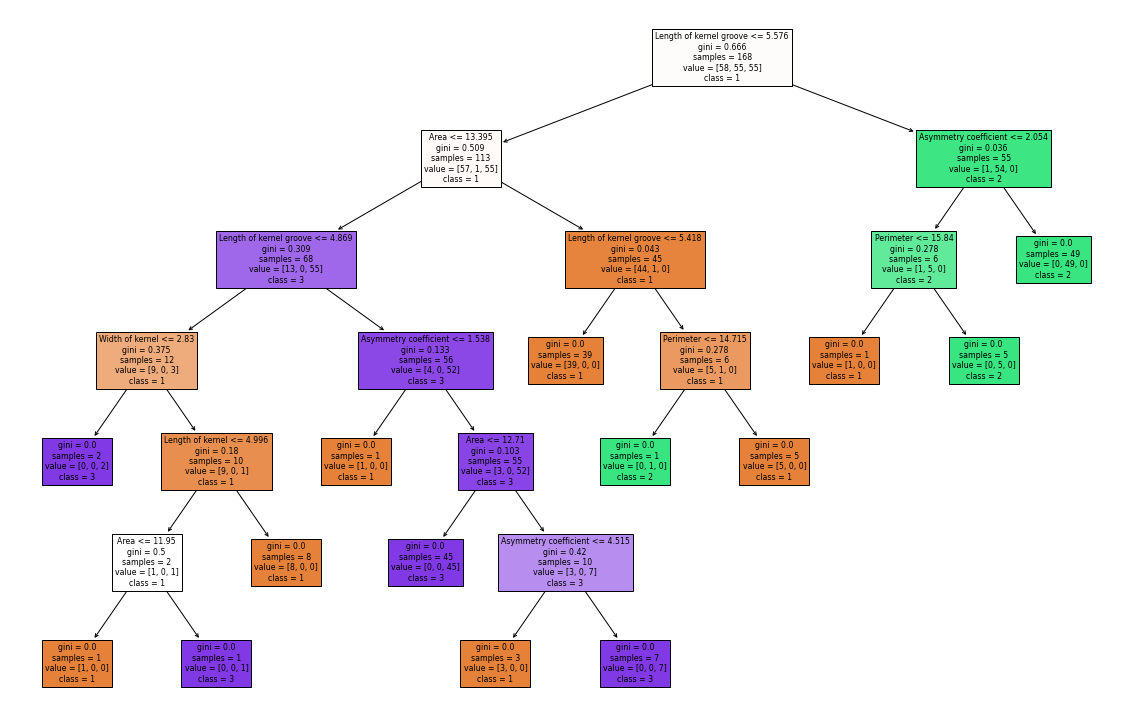

In [11]:
plt.figure(figsize=(20,13))   ## VISUALIZATION OF DECISION TREE
print(tree.plot_tree(clf,filled=True, feature_names=X_train.columns,class_names=df['class'].unique().astype(str)) )

In [12]:
from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)     ## ROC_AUC SCORE FOR mulitclass THIS IS THE FUNCTION

In [13]:
multiclass_roc_auc_score(y_test,y_pred)   ## CALLING THE FUNCTION FOR ROC_AUC_SCORE

0.946604938271605

In [14]:
y_prob=clf.predict_proba(X_test)  ## NOW PREDICTING PROBABILITIES THIS IS THE PREDIFINED FUNCTION FOR FINDING ROC_AUC CURVE

In [15]:
roc_auc_score(y_test,y_prob,multi_class='ovr') ## here you can see result is same

0.946604938271605

##  Hyperparameter Tunning

In [16]:
#  https://gist.github.com/otaviomguerra/51df7a4cff28f92de7105f12a0724115

from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV


# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 7),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X_train,y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))
print()
print(roc_auc_score(y_test,y_prob,multi_class='ovr'))


Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 5, 'min_samples_leaf': 3}
Best score is 0.9162210338680927

0.946604938271605


In [17]:
from sklearn.metrics import auc
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(17, 6)):
    y_score = clf.predict_proba(X_test)
##                                ## ROC PLOTTING FUNCTIONF FOR MULITCLASS  BY  ''' STACKOVERFLOW '''
    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()    

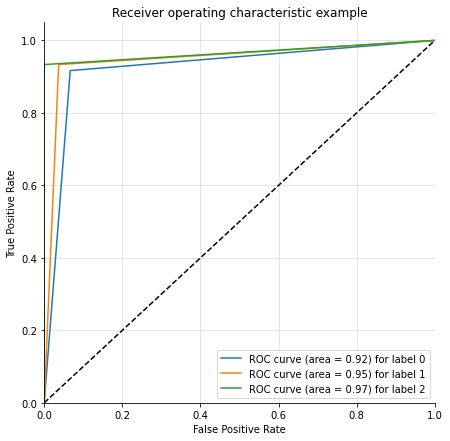

In [18]:
plot_multiclass_roc(clf, X_test, y_test, n_classes=3, figsize=(7,7))  ## total or average auc score is (roc1+roc2+roc3/3)

##  ROC for mulitclass by sklearn

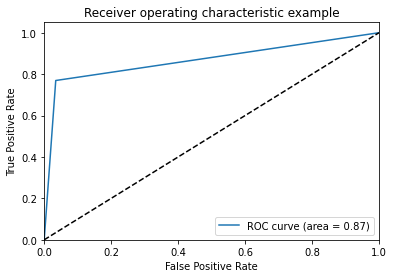

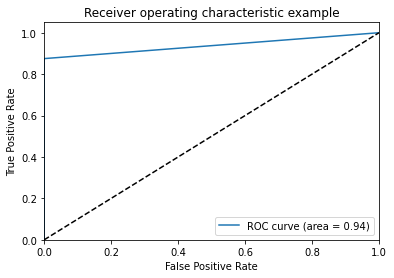

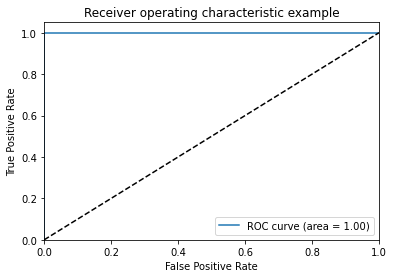

In [19]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize     
from sklearn import tree


y = label_binarize(y, classes=[1,2,3])
n_classes = 3

# shuffle and split training and test sets
X_train, X_test, y_train, y_test =\
    train_test_split(X, y, test_size=0.2, random_state=0)

# classifier
clf = OneVsRestClassifier(tree.DecisionTreeClassifier()) 
y_score = clf.fit(X_train, y_train).predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

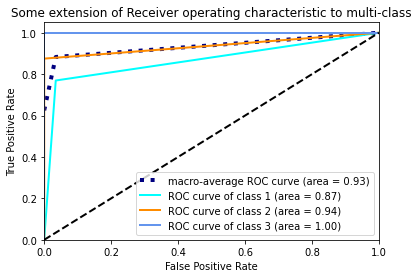

In [20]:
from itertools import cycle
lw=2
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i+1, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

## Hyperparameter Tunning

In [21]:
#  https://gist.github.com/otaviomguerra/51df7a4cff28f92de7105f12a0724115

from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV


# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 7),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X_train,y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 2, 'min_samples_leaf': 4}
Best score is 0.8868092691622103


In [22]:
roc_auc_score(y_test,tree_cv.predict(X_test))

0.9121076480990274

## Post pruning decision trees with cost complexity pruning
https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html

In [23]:
## after hyper parameter tunning we get the result is 
#Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 5, 'min_samples_leaf': 5}
#Best score is 0.9167557932263815
# auc_score 0.9833333333333334


X=df.drop(columns=['class']) #  GETTING DEPENDENT AND INDEPENDENT VARIABLES
y=df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = DecisionTreeClassifier(random_state=0,max_features=5)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [24]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.31292883296435225


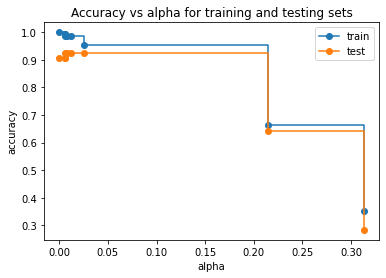

In [25]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [25]:
clf = DecisionTreeClassifier(random_state=0,ccp_alpha=0.05)

In [26]:
clf.fit(X_train,y_train)
probb=clf.predict(X_test)


In [27]:
probb=clf.predict_proba(X_test)
print(roc_auc_score(y_test,probb,multi_class='ovr'))

0.9568365357839043


In [28]:
from sklearn import tree

[Text(744.0, 618.3449999999999, 'Length of kernel groove <= 5.576\ngini = 0.666\nsamples = 157\nvalue = [53, 49, 55]\nclass = 3'),
 Text(558.0, 441.67499999999995, 'Area <= 13.41\ngini = 0.5\nsamples = 107\nvalue = [52, 0, 55]\nclass = 3'),
 Text(372.0, 265.005, 'Length of kernel groove <= 4.789\ngini = 0.294\nsamples = 67\nvalue = [12, 0, 55]\nclass = 3'),
 Text(186.0, 88.33500000000004, 'gini = 0.219\nsamples = 8\nvalue = [7, 0, 1]\nclass = 1'),
 Text(558.0, 88.33500000000004, 'gini = 0.155\nsamples = 59\nvalue = [5, 0, 54]\nclass = 3'),
 Text(744.0, 265.005, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]\nclass = 1'),
 Text(930.0, 441.67499999999995, 'gini = 0.039\nsamples = 50\nvalue = [1, 49, 0]\nclass = 2')]

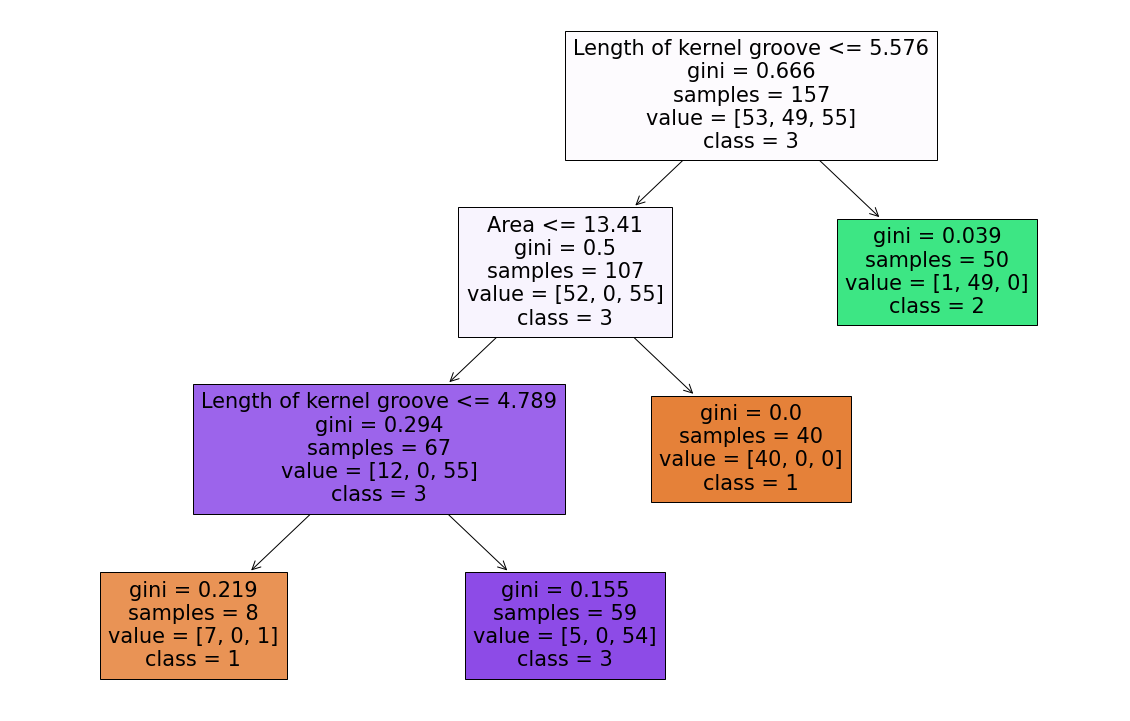

In [29]:
plt.figure(figsize=(20,13))   ## VISUALIZATION OF DECISION TREE
tree.plot_tree(clf,filled=True,feature_names=X_train.columns,class_names=df['class'].unique().astype(str))